<a href="https://colab.research.google.com/github/sscc37/NVIDIA./blob/04040/0404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 4.jpg to 4.jpg

image 1/1 /content/4.jpg: 448x640 13 persons, 203.8ms
Speed: 6.6ms preprocess, 203.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
사람 수: 13


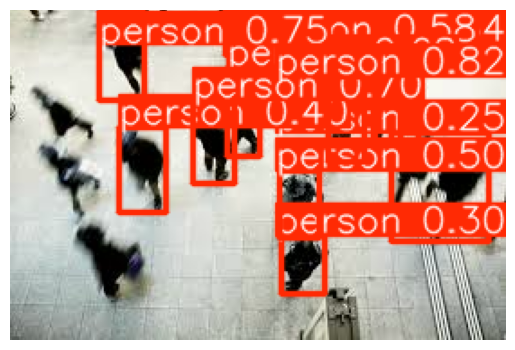

In [ ]:

!pip install ultralytics


from ultralytics import YOLO
import matplotlib.pyplot as plt
from google.colab import files


uploaded = files.upload()


image_path = list(uploaded.keys())[0]


model = YOLO("yolov8n.pt")


results = model(image_path)



people_count = sum([1 for cls in results[0].boxes.cls if cls == 0])


print(f'사람 수: {people_count}')


plt.imshow(results[0].plot())
plt.axis('off')
plt.show()


In [ ]:
# 필요한 라이브러리 설치
!pip install ultralytics pytube opencv-python-headless matplotlib


In [ ]:
# pytube 최신 버전 설치
!pip install --upgrade pytube


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
# 필요한 라이브러리 설치
!pip install yt-dlp ultralytics opencv-python-headless matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.3/977.3 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
import yt_dlp as ydl
import cv2
from ultralytics import YOLO
from google.colab.patches import cv2_imshow # Import cv2_imshow


# YouTube 비디오 다운로드 함수
def download_video_yt_dlp(url):
    ydl_opts = {
        'outtmpl': '/content/downloaded_video.mp4',  # 다운로드 경로 및 파일명 설정
        'format': 'best',  # 가장 좋은 품질의 비디오 다운로드
    }

    with ydl.YoutubeDL(ydl_opts) as ydl_instance:
        ydl_instance.download([url])
    return '/content/downloaded_video.mp4'

# YOLOv8 모델 로드 (자동차 탐지용)
model = YOLO("yolov8n.pt")  # YOLOv8의 작은 모델을 사용합니다. 필요에 따라 다른 모델을 사용할 수 있습니다.

# 주어진 YouTube URL
video_url = 'https://www.youtube.com/shorts/rm6tpt69Qeg'

# 비디오 다운로드
video_path = download_video_yt_dlp(video_url)
print(f"비디오 다운로드 완료: {video_path}")

# 비디오 파일 로드
cap = cv2.VideoCapture(video_path)

# 비디오 정보 얻기
frame_rate = cap.get(cv2.CAP_PROP_FPS)
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 비디오 저장을 위한 VideoWriter 객체 생성
output_video_path = '/content/output_video.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' codec
out = cv2.VideoWriter(output_video_path, fourcc, frame_rate, (frame_width, frame_height))

# 자동차 탐지 변수
car_count = 0
total_frames = 0

# 비디오 프레임 처리
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO 모델로 객체 탐지
    results = model(frame)

    # 자동차 클래스(클래스 번호 2) 필터링
    car_detections = [box for box in results[0].boxes if box.cls == 2]  # '2'는 자동차 클래스

    # 자동차가 탐지된 경우 카운트
    car_count += len(car_detections)
    total_frames += 1

    # 자동차 바운딩 박스 그리기
    for box in car_detections:
        x1, y1, x2, y2 = box.xyxy[0]  # 좌표 추출
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)  # 바운딩 박스 그리기

    # 비디오 프레임을 저장
    out.write(frame)

    # 실시간으로 프레임 출력 (선택 사항)
    # cv2.imshow('Frame', frame) # Replace cv2.imshow with cv2_imshow
    cv2_imshow(frame)

    # 'q'를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 비디오 파일 종료
cap.release()
out.release()
cv2.destroyAllWindows()

# 결과 출력
print(f"자동차 탐지된 총 수: {car_count}")
print(f"처리된 프레임 수: {total_frames}")
print(f"결과 비디오 저장 완료: {output_video_path}")

In [ ]:
!pip install ultralytics


In [ ]:
# 1. 필수 설치
!pip install -q ultralytics yt-dlp opencv-python

# 2. 영상 다운로드
!yt-dlp -f bestvideo+bestaudio --merge-output-format mp4 https://www.youtube.com/shorts/NJ4kfYqbvEQ -o "video.mp4"

# 3. YOLOv11 모델 (사실은 YOLOv8n, 차후에 교체 가능)
from ultralytics import YOLO
import cv2
import numpy as np

# 💡 나중에 YOLOv11이 실제로 나오면 여기 모델만 교체하면 됩니다
model = YOLO('yolov8n.pt')  # 'yolov11.pt' 자리로 대체 가능

# 4. 영상 열기
cap = cv2.VideoCapture('video.mp4')
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# 5. 결과 저장 준비
out = cv2.VideoWriter('yolov11_output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))

# 프레임 분석 설정
skip_frame = 3
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % skip_frame == 0:
        # 차량 클래스만 분석
        results = model(frame, classes=[2, 3, 5, 7])
        annotated = results[0].plot()
        if annotated is None or not isinstance(annotated, np.ndarray):
            annotated = frame
    else:
        annotated = frame

    out.write(annotated)
    frame_count += 1

cap.release()
out.release()

print("✅ YOLOv11 스타일 분석 완료! 'yolov11_output.mp4'로 저장됨")
from IPython.display import Video
Video('yolov11_output.mp4', embed=True)


[youtube] Extracting URL: https://www.youtube.com/shorts/NJ4kfYqbvEQ
[youtube] NJ4kfYqbvEQ: Downloading webpage
[youtube] NJ4kfYqbvEQ: Downloading tv client config
[youtube] NJ4kfYqbvEQ: Downloading player 73381ccc-main
[youtube] NJ4kfYqbvEQ: Downloading tv player API JSON
[youtube] NJ4kfYqbvEQ: Downloading ios player API JSON
[youtube] NJ4kfYqbvEQ: Downloading m3u8 information
[info] NJ4kfYqbvEQ: Downloading 1 format(s): 248+251
[download] Destination: video.f248.webm
[download] 100% of  628.60KiB in 00:00:00 at 1.19MiB/s
[download] Destination: video.f251.webm
[download] 100% of  117.68KiB in 00:00:00 at 198.79KiB/s
[Merger] Merging formats into "video.mp4"
Deleting original file video.f248.webm (pass -k to keep)
Deleting original file video.f251.webm (pass -k to keep)

0: 640x384 10 cars, 1 truck, 43.0ms
Speed: 10.7ms preprocess, 43.0ms inference, 42.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 10 cars, 1 truck, 7.3ms
Speed: 3.1ms preprocess, 7.3ms inference, 1.5m